In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA, SparsePCA, NMF
import tifffile as tif
import skimage
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython import display
skimage.__version__

'0.13.1'

In [2]:
#zebra3d = tif.imread('/Users/nick.antipa/Documents/Diffusers/Miniscope/zebrafish_data/zebrafish_confocal-1_z3_3d.tif')
zebra3d = tif.imread('/Users/nick.antipa/Documents/Diffusers/Miniscope/zebrafish_data/zebrafishBright3.tif');


In [3]:
zebra_ds = rescale(np.moveaxis(zebra3d,0,2),1.0/8.0)

/Users/nick.antipa/anaconda/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


KeyboardInterrupt: 

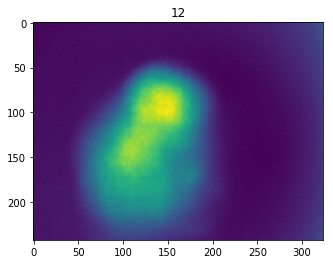

In [4]:
zebra_ds = zebra_ds[:,:,:100]
f = plt.figure()
for n in range(np.shape(zebra_ds)[-1]):
    plt.imshow(zebra_ds[:,:,n])
    plt.title('{}'.format(n))
    display.display(f)
    display.clear_output(wait=True)

In [5]:
vec2im = lambda vec: np.reshape(vec,[np.shape(zebra_ds)[0],np.shape(zebra_ds)[1]])
im2vec = lambda im:np.ravel(im)

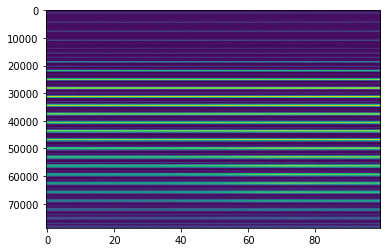

In [6]:
data_real = True

if data_real is True:
    ncomps = 50
    X = []
    nobs = np.shape(zebra_ds)[2]
    for n in range(nobs):
        X.append(im2vec(zebra_ds[:,:,n]))
    X = np.array(X).T
else:
    nobs = 151
    nx = 100000
    ncomps = 75
    t = np.linspace(0,np.pi,nobs)
    x = np.linspace(0,np.pi*2, nx)
    a1 = np.random.rand(1,nx)
    a2 = np.random.rand(1,nx)

    v = []
    a = []
    for n in range(ncomps):
        v.append(np.sin(np.random.randn(1)*25*x))
        a.append(np.random.randn(nobs))

    v = np.array(v).T
    a = np.array(a)
    X = np.dot(v,a)

#X = np.dot(np.atleast_2d(v1).T,a1) + np.dot(np.atleast_2d(v2).T,a2)
plt.imshow(X,aspect='auto')


In [7]:
# ICA
ica = FastICA(n_components = ncomps)
pca_xformer = SparsePCA(n_components=ncomps,alpha=.1,tol=1e-16,method = 'lars')
pca_xformer.verbose = False

pca_xformer.max_iter = 10
ica.max_iter = 1000
ica.tol = .0000000001


In [8]:
pca_xformer.alpha


0.1

In [ ]:
#S_ = ica.fit_transform(X)

pca_xformer.fit(X)
X_transformed = pca_xformer.transform(X)
pca_xformer.n_iter_
pca_xformer.error_

In [ ]:
#A_ = ica.mixing_

f = plt.figure()
#plt.imshow(X_transformed,aspect='auto')
cind = 0
tind = 50;
basis_vec = X_transformed[:,cind]*pca_xformer.components_[cind,tind]
#plt.imshow(vec2im(X_transformed[:,cind]*pca_xformer.components_[cind,-1]))
plt.imshow(vec2im(X[:,tind]-basis_vec))
bg = np.outer(X_transformed[:,cind],pca_xformer.components_[cind,:]);
print(np.shape(bg))
mat_bgrm = X - bg;

for t in range(np.shape(X)[1]):
    #basis_vec = X_transformed[:,cind]*pca_xformer.components_[cind,t]
    #plt.imshow(vec2im(X_transformed[:,cind]*pca_xformer.components_[cind,-1]))
    #plt.imshow(vec2im(X[:,t]-basis_vec))
    plt.imshow(vec2im((mat_bgrm[:,t])))
    display.display(f)
    display.clear_output(wait=True)
    


In [ ]:
#np.allclose(X, np.dot(S_, A_.T)+ica.mean_)
print(np.shape(bg))

In [15]:
# NMF
NMF_model = NMF(n_components = ncomps,init='random',random_state=0,alpha = .001,l1_ratio = .01)
W = NMF_model.fit_transform(X)






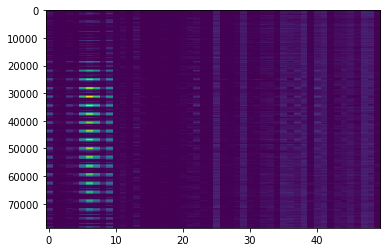

In [16]:
plt.figure()
plt.imshow(W,aspect='auto')

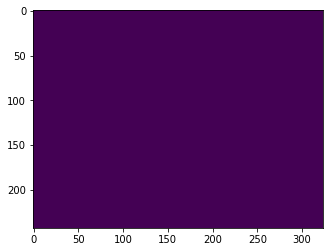

In [14]:
H = NMF_model.components_
f = plt.figure()
for n in range(ncomps):
    plt.imshow(vec2im(W[:,n]))
    display.display(f)
    display.clear_output(wait=True)

In [ ]:
plt.subplot(1,3,1)
plt.imshow(np.dot(S_,A_.T) + ica.mean_, aspect='auto')
plt.subplot(1,3,2)
plt.imshow(X, aspect='auto')
plt.subplot(1,3,3)
plt.imshow(np.dot(S_,A_.T) + ica.mean_ - X, aspect='auto')

In [ ]:
np.shape(A_)

In [ ]:
f = plt.figure()
for n in range(ncomps):
    plt.imshow(vec2im(S_[:,n]))
    display.display(f)
    display.clear_output(wait=True)

In [ ]:
# Find strongest spike in activity and make positive
max_inds = np.argmax(np.abs(A_), axis=0)
A_sign = np.array([np.sign(A_[max_inds[n],n]) for n in range(np.shape(A_)[1])])
A_rect = np.multiply(A_,A_sign)
S_rect = np.multiply(S_, A_sign)
print(np.shape(S_rect))
plt.imshow(A_, aspect='auto')

In [ ]:
f = plt.figure()
for n in range(ncomps):
    plt.imshow(vec2im(S_rect[:,n]))
    display.display(f)
    display.clear_output(wait=True)

In [ ]:
f = plt.figure()
k = 33
for n in range(ncomps-5):
    #plt.imshow((vec2im(S_rect[:,k])*A_rect[n,k]),vmin = 0, vmax = np.max(S_rect[:,k])*np.max(A_rect[:,k]))
    plt.plot(A_rect[:,n])
    display.display(f)
    display.clear_output(wait=True)

In [ ]:
plt.imshow(vec2im(S_rect[:,10]))